In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import subprocess
import os
import argparse

In [2]:

def getPlot(Convdf, methodslist, x, y, title, plottype=None, legend = True):

    # plotting types
    if plottype == "loglog":
        convrates = []
        for method in methodslist:
            Conv = np.polyfit(np.log(Convdf[method][x].to_numpy()), np.log(
                Convdf[method][y].to_numpy()), 1)
            convrates.append(Conv[0])

        plt.figure(figsize=(10, 6))
        for i, method in enumerate(methodslist):
            plt.loglog(Convdf[method][x].to_numpy(), Convdf[method][y].to_numpy(
            ), label=f'{method} Convergence Rate: {convrates[i]:.2f}', marker='o')

    elif plottype == "semilogx":
        plt.figure(figsize=(10, 6))
        for i, method in enumerate(methodslist):
            plt.semilogx(Convdf[method][x].to_numpy(),
                         Convdf[method][y].to_numpy(), marker='o')
    elif plottype == "semilogy":
        plt.figure(figsize=(10, 6))
        for i, method in enumerate(methodslist):
            plt.semilogy(Convdf[method][x].to_numpy(),
                         Convdf[method][y].to_numpy(), marker='o')

    else:
        plt.figure(figsize=(10, 6))
        for i, method in enumerate(methodslist):
            plt.plot(Convdf[method][x].to_numpy(),
                     Convdf[method][y].to_numpy(), marker='o')

    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
    plt.title(title)
    if legend:
        plt.legend()
    plt.grid(True)

    # Ensure the Plots directory exists
    results_dir = "PlotsTest"
    os.makedirs(results_dir, exist_ok=True)

    # Construct the filename and save the plot
    concattitle = ""
    for method in methodslist:
        concattitle += method + "_"

    file_title = f"{concattitle}{x}_vs_{y}.png".replace(" ", "_")
    plt.savefig(os.path.join(results_dir, file_title))


def create_multiindex_dataframe(result_dir, methodlist):
    # Initialize an empty list to hold each method's DataFrame
    dfs = []
    for method in methodlist:
        filename = f"{method}.csv"
        file_path = os.path.join(result_dir, filename)
        df = pd.read_csv(file_path)

        # Create a MultiIndex for columns using the method name and original headers
        multi_cols = [(method, col) for col in df.columns]
        df.columns = pd.MultiIndex.from_tuples(multi_cols)

        dfs.append(df)

    # Concatenate all DataFrames horizontally to create the multi-index structure
    combined_df = pd.concat(dfs, axis=1)
    return combined_df

In [3]:
current_dir = os.getcwd()
results_dir = os.path.join(current_dir, "ResultsLShaped")
methodlist = [os.path.splitext(filename)[0] for filename in os.listdir(results_dir)]
Convdf = create_multiindex_dataframe(results_dir, methodlist)

In [7]:
# Compute things on the dataframe
for method in methodlist:
    Convdf[method, 'MeshTime'] = Convdf[method]['PreMeshCompTime'] + Convdf[method]['RefineTime']
    Convdf[method, 'TotalTime'] = Convdf[method]['PreMeshCompTime'] + Convdf[method]['RefineTime'] + Convdf[method]['SolveTime']
    Convdf[method, 'PreMeshCompTime/Elements'] = Convdf[method]['PreMeshCompTime']/Convdf[method]['Elements']
    Convdf[method, 'MeshTime/Elements'] = Convdf[method]['MeshTime']/Convdf[method]['Elements']
    Convdf[method, 'SolveTime/Elements'] = Convdf[method]['SolveTime']/Convdf[method]['Elements']
    Convdf[method, 'TotalTime/Elements'] = Convdf[method]['TotalTime']/Convdf[method]['Elements']
Convdf = Convdf.sort_index(axis=1)


FileNotFoundError: [Errno 2] No such file or directory: '/home/stefano/Desktop/VI-AMR/NumericalResults/ConvergenceResults/PlotsTest/udo_metricIso_udoBR_metricIsoHess_Elements_vs_MeshTime/Elements.png'

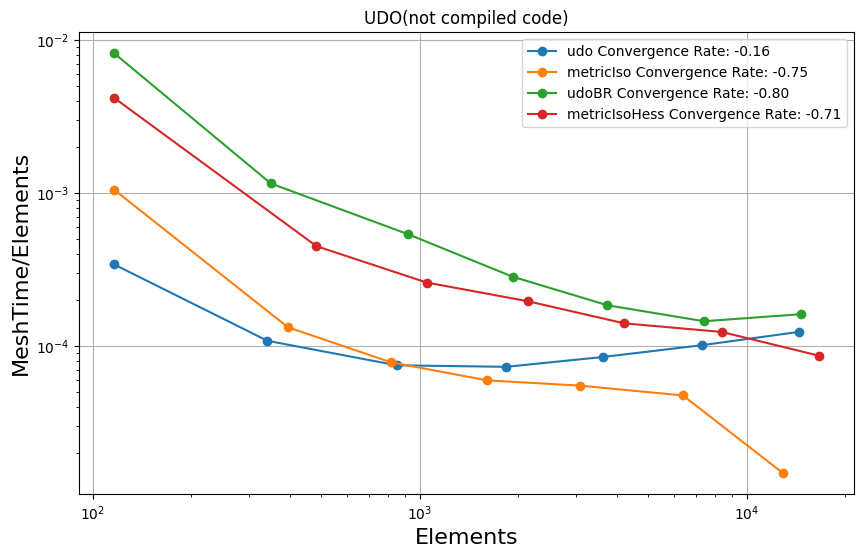

In [8]:
getPlot(Convdf, ['udo', 'metricIso', 'udoBR', 'metricIsoHess'] , 'Elements', 'MeshTime/Elements', 'UDO(not compiled code)', plottype='loglog', legend = True)

FileNotFoundError: [Errno 2] No such file or directory: '/home/stefano/Desktop/VI-AMR/NumericalResults/ConvergenceResults/PlotsTest/vces_metricIso_vcesBR_metricIsoHess_Elements_vs_PreMeshCompTime/Elements.png'

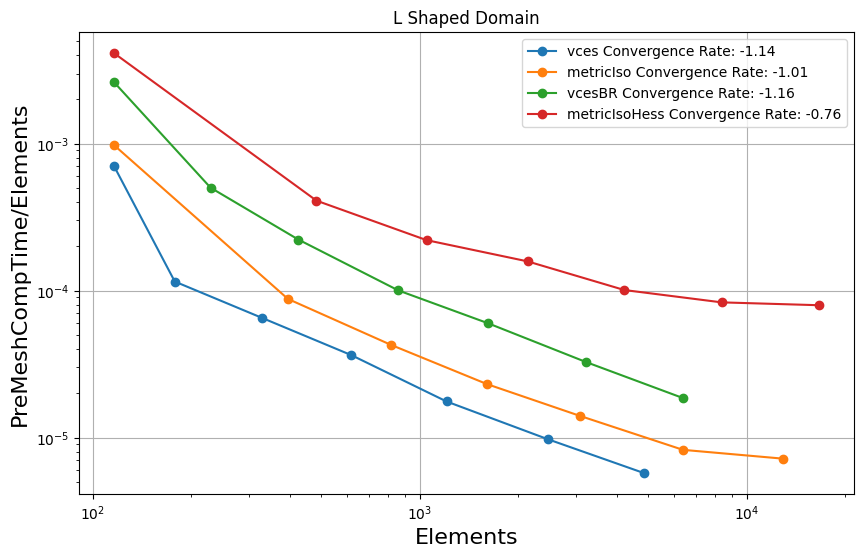

In [12]:
getPlot(Convdf, ['vces', 'metricIso', 'vcesBR', 'metricIsoHess'] , 'Elements', 'PreMeshCompTime/Elements', 'L Shaped Domain', plottype='loglog', legend = True)

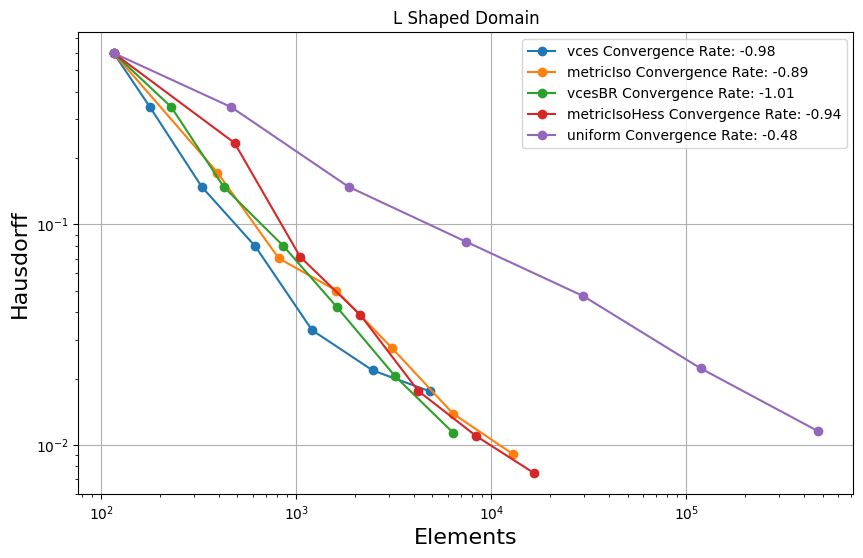

In [13]:
getPlot(Convdf.iloc[0:], ['vces', 'metricIso', 'vcesBR', 'metricIsoHess', 'uniform'] ,  'Elements', 'Hausdorff', 'L Shaped Domain', plottype="loglog", legend = True)

In [53]:
Convdf

metricIso                                                    \
   Elements        H1 Hausdorff   Jaccard        L2  MeshTime   
0       116  0.837545  0.597792  0.242600  0.333769  0.572035   
1       395  0.313486  0.171815  0.775934  0.038545  0.218709   
2       815  0.219070  0.070153  0.918369  0.022249  0.243407   
3      1607  0.192052  0.050120  0.961771  0.017335  0.342279   
4      3085  0.187605  0.027652  0.981407  0.016229  0.498538   
5      6384  0.182626  0.013855  0.989425  0.016776  0.801932   
6     12912  0.187071  0.009100  0.992524  0.017283  1.123900   

                                                                         ...  \
  MeshTime/Elements PreMeshCompTime PreMeshCompTime/Elements RefineTime  ...   
0          0.004931        0.000006             4.768967e-08   0.572030  ...   
1          0.000554        0.000006             1.576963e-08   0.218703  ...   
2          0.000299        0.000006             7.413500e-09   0.243401  ...   
3          0.000213        0.000007             4.155568e-09   0.342272  ...   
4          0.000162        0.000007             2.108914e-09   0.498532  ...   
5          0.000126        0.000006             9.710212e-10   0.801926  ...   
6          0.000087        0.000006             4.848204e-10   1.123894  ...   

         vcesUnif                                                          \
  PreMeshCompTime PreMeshCompTime/Elements RefineTime   SizeMax   SizeMin   
0        0.013933             1.201079e-04   0.002157  1.220128  0.747448   
1        0.002810             6.055843e-06   0.006562  0.689311  0.370121   
2        0.082267             4.432501e-05   0.077505  0.339876  0.186322   
3        0.002498             1.164207e-06   0.026157  0.338758  0.088500   
4        0.033792             3.936633e-06   0.626595  0.169958  0.041764   
5        0.002746             2.809009e-07   0.123771  0.169958  0.024166   
6        0.166676             4.262370e-06   8.096716  0.084980  0.010736   

                                                                       
  SolveTime SolveTime/Elements  TotalTime TotalTime/Elements Vertices  
0  0.088687           0.000765   0.104777           0.000903       76  
1  0.245401           0.000529   0.254773           0.000549      267  
2  0.216492           0.000117   0.376264           0.000203      997  
3  0.240073           0.000112   0.268728           0.000125     1142  
4  0.562165           0.000065   1.222552           0.000142     4429  
5  0.987818           0.000101   1.114334           0.000114     5025  
6  2.713210           0.000069  10.976602           0.000281    19825  

[7 rows x 153 columns]

In [57]:
Convdf.iloc[1:].copy()

metricIso                                                    \
   Elements        H1 Hausdorff   Jaccard        L2  MeshTime   
1       395  0.313486  0.171815  0.775934  0.038545  0.218709   
2       815  0.219070  0.070153  0.918369  0.022249  0.243407   
3      1607  0.192052  0.050120  0.961771  0.017335  0.342279   
4      3085  0.187605  0.027652  0.981407  0.016229  0.498538   
5      6384  0.182626  0.013855  0.989425  0.016776  0.801932   
6     12912  0.187071  0.009100  0.992524  0.017283  1.123900   

                                                                         ...  \
  MeshTime/Elements PreMeshCompTime PreMeshCompTime/Elements RefineTime  ...   
1          0.000554        0.000006             1.576963e-08   0.218703  ...   
2          0.000299        0.000006             7.413500e-09   0.243401  ...   
3          0.000213        0.000007             4.155568e-09   0.342272  ...   
4          0.000162        0.000007             2.108914e-09   0.498532  ...   
5          0.000126        0.000006             9.710212e-10   0.801926  ...   
6          0.000087        0.000006             4.848204e-10   1.123894  ...   

         vcesUnif                                                          \
  PreMeshCompTime PreMeshCompTime/Elements RefineTime   SizeMax   SizeMin   
1        0.002810             6.055843e-06   0.006562  0.689311  0.370121   
2        0.082267             4.432501e-05   0.077505  0.339876  0.186322   
3        0.002498             1.164207e-06   0.026157  0.338758  0.088500   
4        0.033792             3.936633e-06   0.626595  0.169958  0.041764   
5        0.002746             2.809009e-07   0.123771  0.169958  0.024166   
6        0.166676             4.262370e-06   8.096716  0.084980  0.010736   

                                                                       
  SolveTime SolveTime/Elements  TotalTime TotalTime/Elements Vertices  
1  0.245401           0.000529   0.254773           0.000549      267  
2  0.216492           0.000117   0.376264           0.000203      997  
3  0.240073           0.000112   0.268728           0.000125     1142  
4  0.562165           0.000065   1.222552           0.000142     4429  
5  0.987818           0.000101   1.114334           0.000114     5025  
6  2.713210           0.000069  10.976602           0.000281    19825  

[6 rows x 153 columns]

In [56]:
Convdftest

metricIso                                                    \
   Elements        H1 Hausdorff   Jaccard        L2  MeshTime   
1       395  0.313486  0.171815  0.775934  0.038545  0.218709   
2       815  0.219070  0.070153  0.918369  0.022249  0.243407   
3      1607  0.192052  0.050120  0.961771  0.017335  0.342279   
4      3085  0.187605  0.027652  0.981407  0.016229  0.498538   
5      6384  0.182626  0.013855  0.989425  0.016776  0.801932   
6     12912  0.187071  0.009100  0.992524  0.017283  1.123900   

                                                                         ...  \
  MeshTime/Elements PreMeshCompTime PreMeshCompTime/Elements RefineTime  ...   
1          0.000554        0.000006             1.576963e-08   0.218703  ...   
2          0.000299        0.000006             7.413500e-09   0.243401  ...   
3          0.000213        0.000007             4.155568e-09   0.342272  ...   
4          0.000162        0.000007             2.108914e-09   0.498532  ...   
5          0.000126        0.000006             9.710212e-10   0.801926  ...   
6          0.000087        0.000006             4.848204e-10   1.123894  ...   

         vcesUnif                                                          \
  PreMeshCompTime PreMeshCompTime/Elements RefineTime   SizeMax   SizeMin   
1        0.002810             6.055843e-06   0.006562  0.689311  0.370121   
2        0.082267             4.432501e-05   0.077505  0.339876  0.186322   
3        0.002498             1.164207e-06   0.026157  0.338758  0.088500   
4        0.033792             3.936633e-06   0.626595  0.169958  0.041764   
5        0.002746             2.809009e-07   0.123771  0.169958  0.024166   
6        0.166676             4.262370e-06   8.096716  0.084980  0.010736   

                                                                       
  SolveTime SolveTime/Elements  TotalTime TotalTime/Elements Vertices  
1  0.245401           0.000529   0.254773           0.000549      267  
2  0.216492           0.000117   0.376264           0.000203      997  
3  0.240073           0.000112   0.268728           0.000125     1142  
4  0.562165           0.000065   1.222552           0.000142     4429  
5  0.987818           0.000101   1.114334           0.000114     5025  
6  2.713210           0.000069  10.976602           0.000281    19825  

[6 rows x 153 columns]